In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from sklearn.metrics import r2_score as r2, accuracy_score
from sklearn.linear_model import LinearRegression as LR, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import GridSearchCV as GSCV

warnings.filterwarnings('ignore')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [3]:
train = data_train.copy()
test = data_test.copy()

In [4]:
train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [6]:
train.loc[train.HouseYear > 2020]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1497,10814,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B,254084.534396
4189,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B,243028.603096


In [7]:
test.loc[test.HouseYear > 2020, 'Id'].size

0

In [8]:
train.loc[train.Floor > train.HouseFloor, 'Id'].size

1825

In [9]:
train.nlargest(10, 'Rooms')

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,NaN,0,1,B,78364.616704
377,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,NaN,5,15,B,317265.323792
8849,14865,9,10.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,B,B,25,5648,1,30.0,2,4,B,172329.270863
2170,14003,99,6.0,59.414334,38.702244,6.0,7,9.0,1969,0.033494,B,B,66,10573,1,1322.0,3,8,B,229661.964416
1422,4282,195,5.0,95.617533,62.377052,7.0,7,7.0,1940,0.015017,B,B,17,3079,59,2890.0,0,8,B,479525.147323
1503,1243,86,5.0,108.057398,82.723825,8.0,3,5.0,1942,0.161976,B,A,31,7010,5,4508.0,3,7,B,310305.074733
1982,5548,86,5.0,275.645284,233.949309,26.0,12,37.0,2011,0.161976,B,A,31,7010,5,4508.0,3,7,B,455264.882666
3268,8901,34,5.0,121.577423,114.913843,1.0,25,1.0,1977,0.069753,B,B,53,13670,4,NaN,1,11,B,455446.393758
3271,6358,27,5.0,42.003293,NaN,0.0,5,12.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B,112693.641769
4431,7594,53,5.0,39.906082,39.394024,1.0,5,1.0,1977,0.049637,B,B,34,7759,0,229.0,1,3,B,206148.845716


In [10]:
train.nsmallest(15, 'Square')

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
6392,14786,1,1.0,1.136859,4.525736,1.0,3,1.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,181434.825589
8283,15744,34,1.0,1.988943,2.642219,1.0,21,4.0,1977,0.069753,B,B,53,13670,4,NaN,1,11,B,458378.777006
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,126596.941798
1608,10202,6,1.0,2.596351,4.604943,1.0,3,25.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,137597.601458
9294,6782,45,1.0,2.954309,5.257278,1.0,3,1.0,1977,0.195781,B,B,23,5212,6,NaN,3,2,B,438005.182323
3280,10527,27,1.0,4.380726,40.805837,1.0,10,17.0,2013,0.211401,B,B,9,1892,0,NaN,0,1,B,97560.720383
4900,4504,27,3.0,4.390331,5.610772,1.0,8,19.0,2016,0.211401,B,B,9,1892,0,NaN,0,1,B,161379.067034
9613,7657,38,1.0,4.502784,4.618547,1.0,28,1.0,1977,0.060753,B,B,15,2787,2,520.0,0,7,B,483283.488083
1316,11526,27,1.0,4.633498,1.969969,1.0,18,1.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B,107604.269441
8030,13265,1,3.0,4.823679,79.767964,0.0,6,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,237716.681261


In [11]:
def prepare_house(data):
    
    data.loc[data.HouseYear==20052011,'HouseYear']=2011
    data.loc[data.HouseYear==4968,'HouseYear']=1968
    data.drop('Healthcare_1', axis=1, inplace=True)
    data.loc[data.Floor > data.HouseFloor, 'HouseFloor'] = data.Floor
    data.loc[(data.Rooms > 5)&(data.Square < 45), 'Rooms'] = 1
    data.loc[(data.Rooms > 5)&(data.Square >= 45)&(data.Square < 80), 'Rooms'] = 2
    data.loc[(data.Rooms < 1), 'Rooms'] = 1
    
    return data

In [12]:
def prepare_train_square(data):
    
    mean_square_by_room = ((data['Square']/data['Rooms']).mean()/1.5)
    mean_square_kitchen = data['KitchenSquare'].mean()
    
    data.loc[(data.Square < 16), 'Square'] = mean_square_by_room * data.loc[(data.Square < 16), 'Rooms']
    data.loc[(data.KitchenSquare/data.Square) > 0.5, 'KitchenSquare'] = mean_square_kitchen
    
    relation_square_lifesquare = (data.Square/data.LifeSquare).mean()
    
    data['LifeSquare'].fillna(data['Square']/relation_square_lifesquare, inplace=True)
    data.loc[(data.LifeSquare + data.KitchenSquare) > data.Square, 'LifeSquare'] = data.Square - data.KitchenSquare
    data.loc[(data.Square/data.LifeSquare) > relation_square_lifesquare, 'LifeSquare'] = data.Square/relation_square_lifesquare
    
    return data, mean_square_by_room, mean_square_kitchen, relation_square_lifesquare

In [13]:
def prepare_all_data(train, test):
    
    train = prepare_house(train)
    test = prepare_house(test)
    
    train, mean_square_by_room_const, mean_square_kitchen_const, relation_square_lifesquare_const = prepare_train_square(train)
    
    test.loc[(test.Square < 16), 'Square'] = mean_square_by_room_const * test.loc[(test.Square < 16), 'Rooms']
    test.loc[(test.KitchenSquare/test.Square) > 0.5, 'KitchenSquare'] = mean_square_kitchen_const
    
    test['LifeSquare'].fillna(test['Square']/relation_square_lifesquare_const, inplace=True)
    test.loc[(test.LifeSquare + test.KitchenSquare) > test.Square, 'LifeSquare'] = test.Square - test.KitchenSquare
    test.loc[(test.Square/test.LifeSquare) > relation_square_lifesquare_const, 'LifeSquare'] = test.Square/relation_square_lifesquare_const
    
    train = pd.get_dummies(train)
    test = pd.get_dummies(test)
    
    return train, test

In [14]:
clear_train, clear_test = prepare_all_data(train, test)

In [15]:
clear_test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_2,Social_3,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,8412.595400,51.279200,1.907400,56.486459,34.692042,5.732311,8.632000,13.395000,1984.392600,0.119874,...,5406.900000,8.262600,1.31940,4.242800,0.009600,0.990400,0.029800,0.970200,0.082400,0.917600
std,4832.674037,44.179466,0.810282,19.012885,15.014254,3.957634,5.483228,6.231945,18.573149,0.120070,...,4026.614773,23.863762,1.47994,4.777365,0.097518,0.097518,0.170052,0.170052,0.275001,0.275001
min,1.000000,0.000000,1.000000,16.319015,9.698766,0.000000,1.000000,1.000000,1908.000000,0.000000,...,168.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4221.750000,21.000000,1.000000,41.912403,23.043448,1.000000,4.000000,9.000000,1973.000000,0.019509,...,1564.000000,0.000000,0.00000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,31.501606,6.000000,7.000000,14.000000,1977.000000,0.072158,...,5285.000000,2.000000,1.00000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,12598.250000,77.000000,2.000000,66.285129,41.934895,9.000000,12.000000,17.000000,2000.000000,0.195781,...,7287.000000,5.000000,2.00000,6.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,16795.000000,212.000000,6.000000,223.453689,168.729035,42.000000,78.000000,99.000000,2020.000000,0.521867,...,19083.000000,141.000000,6.00000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


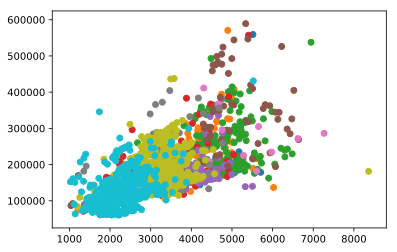

In [16]:
for dstr in clear_train.DistrictId.unique()[0:10]:
    plt.scatter(clear_train.loc[clear_train.DistrictId==dstr, 'Price']/clear_train.loc[clear_train.DistrictId==dstr, 'Square'], 
             clear_train.loc[clear_train.DistrictId==dstr, 'Price'])

plt.show()

In [17]:
X = clear_train.copy()
Test = clear_test.copy()

In [18]:
mean_price_by_square = pd.concat([X, pd.DataFrame({'mean_price_by_square':X.Price/X.Square},
                                                  columns=['mean_price_by_square'])], axis=1)
mean_price_by_rooms_district = mean_price_by_square.groupby(['DistrictId','Rooms']).agg({'mean_price_by_square':'mean'})
X = pd.merge(X, mean_price_by_rooms_district, on=['DistrictId','Rooms'], how='left')
Test = pd.merge(Test, mean_price_by_rooms_district, on=['DistrictId','Rooms'], how='left')
Test['mean_price_by_square'].fillna(Test['mean_price_by_square'].mean(), inplace=True)

In [19]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 22 columns):
Id                      5000 non-null int64
DistrictId              5000 non-null int64
Rooms                   5000 non-null float64
Square                  5000 non-null float64
LifeSquare              5000 non-null float64
KitchenSquare           5000 non-null float64
Floor                   5000 non-null int64
HouseFloor              5000 non-null float64
HouseYear               5000 non-null int64
Ecology_1               5000 non-null float64
Social_1                5000 non-null int64
Social_2                5000 non-null int64
Social_3                5000 non-null int64
Helthcare_2             5000 non-null int64
Shops_1                 5000 non-null int64
Ecology_2_A             5000 non-null uint8
Ecology_2_B             5000 non-null uint8
Ecology_3_A             5000 non-null uint8
Ecology_3_B             5000 non-null uint8
Shops_2_A               5000 non-null uint8
S

In [20]:
y = X.Price
X.drop('Price', axis=1, inplace=True)

In [21]:
id_X = pd.DataFrame({'Id':X['Id']}, columns=['Id'])
id_Test = pd.DataFrame({'Id':Test['Id']}, columns=['Id'])
X.drop('Id', axis=1, inplace=True)
Test.drop('Id', axis=1, inplace=True)

In [22]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.30, random_state=42)

In [23]:
model_lr, model_L, model_R, model_RFR = LR(), Lasso(), Ridge(), RFR()

In [24]:
model_lr.fit(X_train, y_train)
model_L.fit(X_train, y_train)
model_R.fit(X_train, y_train)
model_RFR.fit(X_train, y_train);

In [25]:
y_pred_lr = model_lr.predict(X_valid)
y_pred_L = model_L.predict(X_valid)
y_pred_R = model_R.predict(X_valid)
y_pred_RFR = model_RFR.predict(X_valid)

In [26]:
r2(y_valid, y_pred_lr)

0.6482599118017335

In [27]:
r2(y_valid, y_pred_L)

0.64826405279203

In [28]:
r2(y_valid, y_pred_R)

0.6482521463528005

In [29]:
r2(y_valid, y_pred_RFR)

0.7398880535794256

In [30]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_valid_scaled = pd.DataFrame(scaler.transform(X_valid), columns=X_valid.columns)

In [31]:
model_lr.fit(X_train_scaled, y_train)
model_L.fit(X_train_scaled, y_train)
model_R.fit(X_train_scaled, y_train);

In [32]:
y_pred_lr_sc = model_lr.predict(X_valid_scaled)
y_pred_L_sc = model_L.predict(X_valid_scaled)
y_pred_R_sc = model_R.predict(X_valid_scaled)

In [33]:
r2(y_valid, y_pred_lr_sc)

0.6482599118017303

In [34]:
r2(y_valid, y_pred_L_sc)

0.6482523060897174

In [35]:
r2(y_valid, y_pred_R_sc)

0.6482444276753203

In [36]:
def plot_r2_forest(name_param, param_data):
    
    r2_on_valid = []
    r2_on_train = []

    for itm in param_data:
        
        if name_param == 'n_estimators':
            clf = RFR(n_estimators=itm, random_state=42, n_jobs=10)
        elif name_param == 'max_features':
            clf = RFR(max_features=itm, random_state=42, n_jobs=10)
        elif name_param == 'max_depth':
            clf = RFR(max_depth=itm, random_state=42, n_jobs=10)
        elif name_param == 'min_samples_leaf':
            clf = RFR(min_samples_leaf=itm, random_state=42, n_jobs=10)
        else:
            clf = RFR(random_state=itm, n_jobs=10)
        
        clf.fit(X_train, y_train)

        r2_on_valid.append(r2(y_valid, clf.predict(X_valid)))
        r2_on_train.append(r2(y_train, clf.predict(X_train)))

    plt.plot(param_data, r2_on_valid, label="valid")
    plt.plot(param_data, r2_on_train, label="train")

    plt.xlabel('Значение параметра')
    plt.ylabel('r2_score')

    plt.legend()
    plt.grid()
    plt.show()

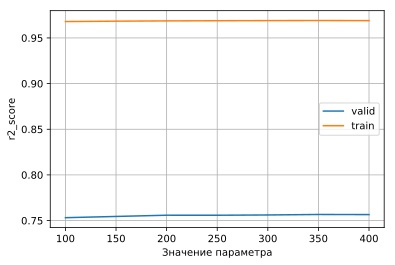

In [37]:
plot_r2_forest('n_estimators', np.arange(100, 450, 50));

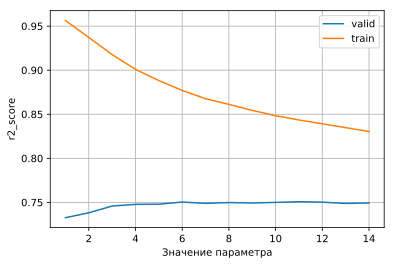

In [38]:
plot_r2_forest('min_samples_leaf', np.arange(1, 15));

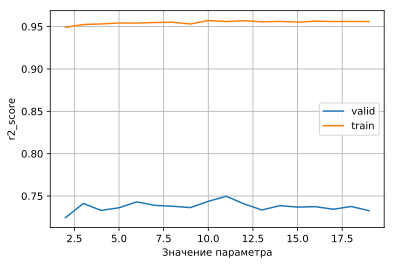

In [39]:
plot_r2_forest('max_features', np.arange(2, 20));

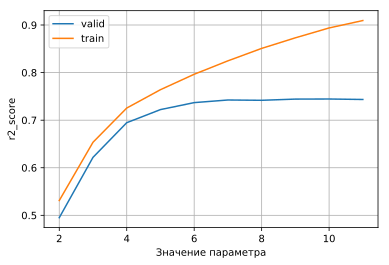

In [40]:
plot_r2_forest('max_depth', np.arange(2, 12));

In [41]:
papameters = [{'n_estimators':[300, 350, 400],
              'max_features': np.arange(9, 13),
              'max_depth': np.arange(5, 9)}]

In [42]:
clf = GSCV(estimator=RFR(random_state=42, n_jobs=10), param_grid=papameters, scoring='r2', cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=10,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [300, 350, 400], 'max_features': array([ 9, 10, 11, 12]), 'max_depth': array([5, 6, 7, 8])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [43]:
clf.best_params_

{'max_depth': 8, 'max_features': 12, 'n_estimators': 400}

In [44]:
for feature, importance in zip(X.columns, clf.best_estimator_.feature_importances_):
    print(feature, importance)

DistrictId 0.008019580510027893
Rooms 0.1124090938029412
Square 0.3452073854156909
LifeSquare 0.08124500216644368
KitchenSquare 0.017676152423828993
Floor 0.008045700297132448
HouseFloor 0.00955589219457983
HouseYear 0.01209497452891367
Ecology_1 0.00820640540815948
Social_1 0.03644544994211678
Social_2 0.0416888005963073
Social_3 0.017297525178550658
Helthcare_2 0.0033819473911413014
Shops_1 0.005404776635949782
Ecology_2_A 6.626253435044156e-05
Ecology_2_B 3.281484583162275e-05
Ecology_3_A 0.00017594807431352416
Ecology_3_B 0.00018406023894290886
Shops_2_A 0.0002182119662296907
Shops_2_B 0.00019945100774553765
mean_price_by_square 0.29244456484080295


In [45]:
best_model = RFR(n_estimators=350, max_features=11, max_depth=6, random_state=42, n_jobs=10)
best_model.fit(X_train, y_train)
y_pred_train = best_model.predict(X_train)
y_pred_valid = best_model.predict(X_valid)

In [46]:
r2(y_train, y_pred_train)

0.7939466711519838

In [47]:
r2(y_valid, y_pred_valid)

0.7415183285957992

In [48]:
test_pred = pd.DataFrame({'Price':best_model.predict(Test)}, columns=['Price'])
test_pred = pd.concat([id_Test, test_pred], axis=1)

In [49]:
test_pred.to_csv('ABelinskiy_predictions.csv', sep=',', index=None)